In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
import math

In [ ]:
import numpy as np

In [ ]:
#Este código no responde con el while, ¿por qué?
def taylor_seno(angulo,tol): #¿no se puede hacer sin math.sin?, numeral a
  seno=0
  real=math.sin(angulo) #recibe angulo en rad
  print('real', real)
  i = 0
  while (real-seno)>tol:
    seno+=(-1)**i*angulo**(2*1-1)/math.factorial(2*i+1)
    print(seno)
    i+=1
  return i, seno

In [ ]:
taylor_seno(10,0.5)

real -0.5440211108893698


(0, 0)

In [ ]:
def taylor_seno(angulo,tol): #funcion de control
  seno=0
  max_iter=100
  real=math.sin(angulo)
  print('seno real', real)
  i = 0
  errors=np.zeros(max_iter) #guardar el error  #¿esto es un vector 1D?
  #print(errors)
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  #print(iteraciones)

  while abs(real-seno)>tol:
    seno+=(-1)**i*angulo**(2*i+1)/math.factorial(2*i+1)
    #print('iter seno',seno)
    error=abs(real-seno)
    #print('error', error)
    errors[i]=error
    i+=1
    if i>max_iter:
      break
  return errors[:i],iteraciones[:i],seno

In [ ]:
taylor_seno(32,0.5)

seno real 0.5514266812416906


(array([3.14485733e+01, 5.42988476e+03, 2.74190382e+05, 6.54321802e+06,
        9.04154793e+07, 8.12181849e+08, 5.11255959e+09, 2.37776082e+10,
        8.49853763e+10, 2.40667536e+11, 5.53305279e+11, 1.05346975e+12,
        1.68875963e+12, 2.31130146e+12, 2.73311056e+12, 2.82116676e+12,
        2.56479912e+12, 2.06984715e+12, 1.49312416e+12, 9.68739955e+11,
        5.68423980e+11, 3.03146269e+11, 1.47605213e+11, 6.58867006e+10,
        2.70621598e+10, 1.02631865e+10, 3.60515700e+09, 1.17638634e+09,
        3.57542354e+08, 1.01470790e+08, 2.69525591e+07, 6.71500618e+06,
        1.57239451e+06, 3.46714109e+05, 7.21194852e+04, 1.41754042e+04,
        2.63699438e+03, 4.64968886e+02, 7.78216775e+01, 1.23791562e+01,
        1.87480270e+00, 2.69783534e-01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 0.28164314767394716)

In [ ]:
x_32=math.radians(80)
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
er32, N32, seno_32= taylor_seno(x_32,tol_32)
print('estos son los errores',er32,'estas las iter', N32, 'valor seno',seno_32)


seno real 0.984807753012208
estos son los errores [4.11455649e-01 4.22255831e-02 1.99816285e-03 5.46102369e-05
 9.72913452e-07 1.21975796e-08] estas las iter [0 1 2 3 4 5] valor seno 0.9848077408146284


In [ ]:
prnt32=abs((seno_32-math.sin(80))/math.sin(80))
prnt32

1.9908632613167274

In [ ]:
x_64=math.radians(80)
tol_=np.finfo(np.float64).eps #epsilon de la maquina
er64, N64, seno_64= taylor_seno(x_64,tol_32)
print('estos son los errores',er64,'estas las iter', N64, 'valor seno',seno_64)

seno real 0.984807753012208
estos son los errores [4.11455649e-01 4.22255831e-02 1.99816285e-03 5.46102369e-05
 9.72913452e-07 1.21975796e-08] estas las iter [0 1 2 3 4 5] valor seno 0.9848077408146284


In [ ]:
prnt64=abs((seno_64-math.sin(80))/math.sin(80))
prnt64

1.990863249044146

In [ ]:
import matplotlib.pyplot as plt

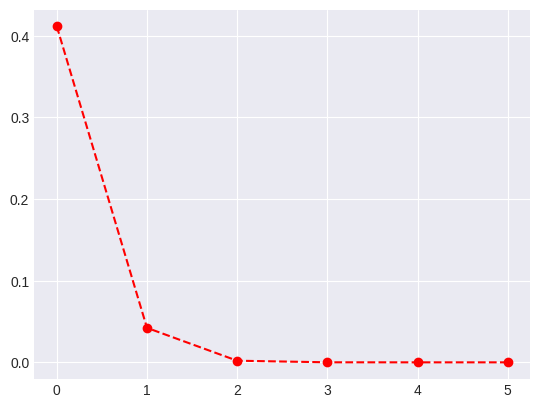

In [ ]:
plt.plot(N32, er32, 'ro--')
plt.show()

In [ ]:
def taylor_seno(angulo,iteraciones):
  seno=0
  for  i in range(1,iteraciones+1):
    seno+=(-1)**i-1*angulo**(2*1-1)/math.factorial(2*i-1)
  return seno

x=np.deg2rad(30) #convertir de grad a rad
max_inter=8
seno_real=np.sin(x)
print(f'el valor de seno con {max_inter} iteraciones es ', taylor_seno(x,max_inter))
print(f'el valor real será: {seno_real}')

el valor de seno con 8 iteraciones es  -0.6153339060735522
el valor real será: 0.49999999999999994


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
# Librerias
import numpy as np
import math

In [ ]:
def taylor_expo(x,tol):
  exp=0
  e_real=np.exp(-x)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  while abs(e_real-exp)>tol:
    exp+=((-1)**j) * (x**j) / math.factorial(j)
    #print(exp)
    j=j+1
    if j>max_iter:
      break
  print('j:',j,', e_real:',e_real,', miexp:',exp)


In [ ]:
x1 = np.linspace(1, 11, 100)

In [ ]:
1/np.exp(201)

5.091070808950109e-88

In [ ]:
taylor_expo(201, 1e-7)

j: 0 , e_real: 5.09107080895011e-88 , miexp: 0


In [ ]:
def taylor_expo32(x_32,tol32):
  exp=0
  e_real=np.exp(-x_32)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  while abs(e_real-exp)>tol32:
    exp+=((-1)**j) * (x_32**j) / math.factorial(j)
    error=abs(e_real-exp)
    errors[j]=error
    #print(exp)
    j=j+1
    if j>max_iter:
      break
  iteraciones32=j
  print('iteraciones',iteraciones32,', e_real:',e_real,', miexp:',exp)

In [ ]:
x_32=0.3
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
taylor_expo32(x_32,tol_32)

iteraciones 7 , e_real: 0.7408182206817179 , miexp: 0.7408182624999999


a.

In [ ]:
def taylor_expo_a(x32,tol32):
  iteraciones32=13
  exp=0
  e_real=np.exp(-x32)
  max_iter=100
  j=0
  for j in range(0,iteraciones32):
      print('j',j)
      exp+=((-1)**j) * (x32**j) / math.factorial(j)
      siguiente=((-x32)**(j+1))/math.factorial(j+1)
      print('siguiente',siguiente)
      suma=10**(-7)*exp
      print('suma',suma)
      if abs(siguiente)<=abs(suma):
        break
  print('jtotal',j)

In [ ]:
x32=0.3
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
taylor_expo_a(x32,tol_32)

j 0
siguiente -0.3
suma 1e-07
j 1
siguiente 0.045
suma 6.999999999999999e-08
j 2
siguiente -0.0045
suma 7.45e-08
j 3
siguiente 0.00033749999999999996
suma 7.405e-08
j 4
siguiente -2.0249999999999994e-05
suma 7.408375e-08
j 5
siguiente 1.0124999999999998e-06
suma 7.4081725e-08
j 6
siguiente -4.339285714285713e-08
suma 7.408182624999999e-08
jtotal 6


Respuesta a. N=6

b.

In [ ]:
def taylor_expo32_b(x32,tol32):
  exp=0
  e_real=np.exp(-x32)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  for j in range(0,9):
    exp+=((-1)**j) * (x32**j) / math.factorial(j)
  term10=((-1)**10) * (x32**10) / math.factorial(10)
  term9=((-1)**9) * (x32**9) / math.factorial(9)
  cancel=term10+term9
  print(exp, term10, term9, 'cancelacion', cancel)

In [ ]:
x32=10
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
taylor_expo32_b(x32,tol_32)

1342.5873015873017 2755.731922398589 -2755.731922398589 cancelacion 0.0


La cancelación es casi perfecta para la suma de los términos de n=9 y n=10, da cero porque es una aproximación

c.

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
def taylor_inv(x,inc):
  real_value=np.exp(x)
  #print(real_value)
  result=0
  max_iter=30
  i=0
  results=np.zeros(max_iter)
  while (real_value-result)>inc:
    result+=(x**i)/math.factorial(i)
    results[i]=result
    #print(result)
    i+=1
    if abs(result-real_value)<=inc:
      #print('error',result-real_value)
      break
    if i>=30:
      break
  print(results)

  print('iter',i,'    real',real_value, '    pos',result,'   neg', )

  e_real_n=np.exp(-x)
  e_neg=0
  for result in results:
    e_neg=1/result
    error=abs((e_neg)-(e_real_n))
    if error<=inc:
      break
  ubicacion = np.where(results == result)
  print(e_neg, 'real', e_real_n,'  result', ubicacion)

In [ ]:
x=10
inc=np.finfo(np.float32).eps
taylor_inv(10,inc)
#ahora hallemos la aproximacion para e^-x

[1.00000000e+00 1.10000000e+01 6.10000000e+01 2.27666667e+02
 6.44333333e+02 1.47766667e+03 2.86655556e+03 4.85068254e+03
 7.33084127e+03 1.00865732e+04 1.28423051e+04 1.53475160e+04
 1.74351917e+04 1.90410960e+04 2.01881706e+04 2.09528870e+04
 2.14308347e+04 2.17119804e+04 2.18681725e+04 2.19503788e+04
 2.19914820e+04 2.20110550e+04 2.20199518e+04 2.20238199e+04
 2.20254317e+04 2.20260764e+04 2.20263243e+04 2.20264162e+04
 2.20264490e+04 2.20264603e+04]
iter 30     real 22026.465794806718     pos 22026.460266271286    neg
4.547215139175042e-05 real 4.5399929762484854e-05   result (array([20]),)


In [ ]:
x_32=10
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
taylor_expo32(x_32,tol_32)

iteraciones 39 , e_real: 4.5399929762484854e-05 , miexp: 4.5439110291729325e-05


Para la serie alternante directamente converge para x=10 en 39 iteraciones y para el inverso de la serie exponencial converge para 20 iteraciones, por lo tanto, es más eficiente el inverso con valores grandes de x.

e.

In [ ]:
def taylor_expo_e(x):
  exp=0
  e_real=np.exp(-x)
  j=0
  errors=np.zeros(101) #guardar el error
  iteraciones= np.arange(101) #iteracion asociada al error
  for j in range(0,101):
    exp+=((-1)**j) * (x**j) / math.factorial(j)

  error_=abs(e_real-exp)
  return error_
  #print('j:',j,', e_real:',e_real,', miexp:',exp, error_)

In [ ]:
taylor_expo_e(1)

1.1102230246251565e-16

In [ ]:
np.linspace(0,100,20)

array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
        21.05263158,  26.31578947,  31.57894737,  36.84210526,
        42.10526316,  47.36842105,  52.63157895,  57.89473684,
        63.15789474,  68.42105263,  73.68421053,  78.94736842,
        84.21052632,  89.47368421,  94.73684211, 100.        ])

In [ ]:
errors_=np.zeros(101)
x_=np.zeros(101)
for x in range(0,101):
  x_[x]=x
  errors_[x]=taylor_expo_e(x)
print(errors_)
print(x_)

[0.00000000e+00 1.11022302e-16 5.55111512e-17 4.16333634e-17
 2.63677968e-16 1.43982049e-15 1.79717352e-15 1.15111913e-14
 4.95605076e-14 7.49073113e-14 3.28877130e-13 1.27741170e-12
 3.19182420e-13 1.57516648e-12 3.93906134e-12 3.19161394e-11
 7.76723586e-12 4.25015123e-10 6.28703942e-10 2.70041144e-09
 1.51334333e-09 3.91528445e-09 2.41830530e-08 2.76016655e-08
 2.36455972e-07 6.68969956e-07 1.34665796e-06 4.47412389e-06
 5.01691001e-06 5.50957548e-05 8.55301518e-05 1.55878642e-04
 2.59745995e-04 8.49219715e-04 9.03442276e-03 7.95190127e-03
 7.48558915e-03 8.64751549e-02 1.87019213e-01 4.06211804e+00
 4.90920248e+01 5.82701843e+02 6.66165112e+03 7.12327180e+04
 7.21536421e+05 6.93451664e+06 6.34082895e+07 5.52771789e+08
 4.60375268e+09 3.66989626e+10 2.80505300e+11 2.05919835e+12
 1.45414053e+13 9.89254647e+13 6.49246617e+14 4.11608306e+15
 2.52390723e+16 1.49861702e+17 8.62625630e+17 4.81870054e+18
 2.61487889e+19 1.37976055e+20 7.08569569e+20 3.54458173e+21
 1.72866362e+22 8.225485

In [ ]:
import matplotlib.pyplot as plt

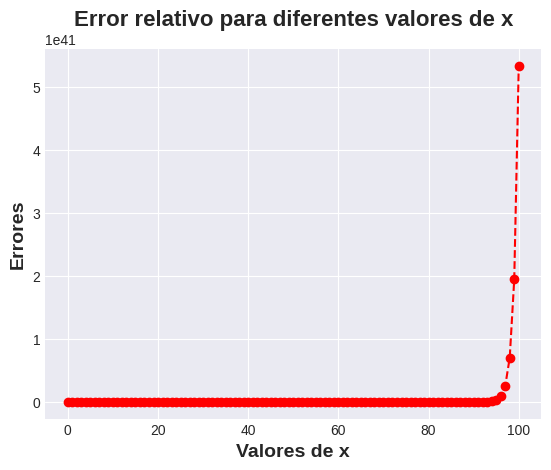

In [ ]:
plt.plot(errors_, 'ro--')
plt.xlabel('Valores de x', fontsize=14, fontweight='bold')
plt.ylabel('Errores', fontsize=14, fontweight='bold')
plt.title('Error relativo para diferentes valores de x',fontsize=16, fontweight='bold')
plt.show()

La serie de Taylor para exponencial es menos efectiva a medida que x crece porque la serie converge lentamente y está más propensa a errores numéricos debido a la cancelación y el redondeo. Por esta razón, para valores grandes de
x.

d. Compararemos la serie taylor para e^-x con el inverso de la serie e^x, dejando fijo un valor de N

In [ ]:
def taylor_inv_d(x):
  real_value=np.exp(x)

  result=0
  max_iter=50
  for i in range(0,50):
    result+=(x**i)/math.factorial(i)
    #print(result)

  e_real_n=np.exp(-x)
  e_neg=1/result
  error=abs((e_neg)-(e_real_n))


  #ubicacion = np.where(results == result)

  return error
  #print(e_neg, 'real', e_real_n,'  result','iter', i)

In [ ]:
taylor_inv_d(10)

6.776263578034403e-21

In [ ]:
def taylor_expo_d(x):
  expo=0
  e_real=np.exp(-x)
  max_iter=100
  for j in range(0,50):
    expo+=((-1)**j) * (x**j) / math.factorial(j)



  error=abs(e_real-expo)
  return error

  iteraciones32=j
  #print('iteraciones',iteraciones32,', e_real:',e_real,', miexp:',expo)

In [ ]:
taylor_expo_d(10)

3.3162464067133454e-13

In [ ]:
errors_inv=np.zeros(51)
errors_expo=np.zeros(51)

for x in range(0,50):
  x_[x]=x
  errors_inv[x]=taylor_inv_d(x)
  errors_expo[x]=taylor_expo_d(x)
print(errors_inv)
print(errors_expo)


[0.00000000e+00 5.55111512e-17 2.77555756e-17 1.38777878e-17
 6.93889390e-18 1.73472348e-18 0.00000000e+00 6.50521303e-19
 5.42101086e-20 2.71050543e-20 6.77626358e-21 0.00000000e+00
 3.38813179e-21 1.14349448e-20 6.27863172e-20 2.76979774e-19
 9.71255623e-19 2.80191882e-18 6.80214771e-18 1.41597224e-17
 2.56797613e-17 4.11295538e-17 5.88604240e-17 7.60335539e-17
 8.94432713e-17 9.65677844e-17 9.63493662e-17 8.93832802e-17
 7.75234979e-17 6.31716789e-17 4.85811150e-17 3.54036774e-17
 2.45421018e-17 1.62404863e-17 1.02936871e-17 6.26942996e-18
 3.68066201e-18 2.08922491e-18 1.14999399e-18 6.15623529e-19
 3.21415027e-19 1.64107247e-19 8.21540885e-20 4.04243494e-20
 1.95965845e-20 9.37967761e-21 4.44168002e-21 2.08485705e-21
 9.71698711e-22 4.50414629e-22 0.00000000e+00]
[0.00000000e+00 1.11022302e-16 5.55111512e-17 4.16333634e-17
 2.63677968e-16 1.43982049e-15 1.79717352e-15 1.15111913e-14
 4.95605618e-14 7.49217311e-14 3.31624641e-13 9.60110450e-13
 2.38860982e-11 1.30514299e-09 5.21864

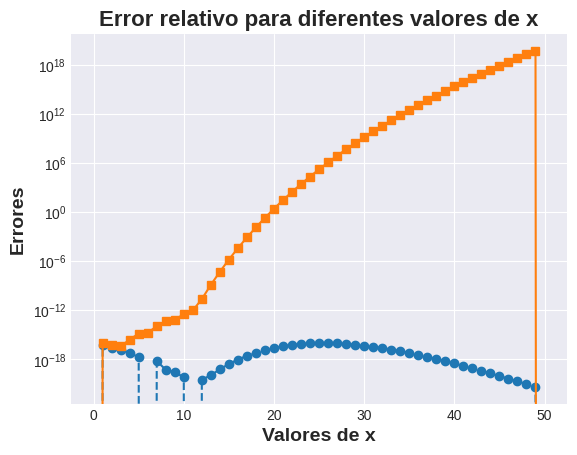

In [ ]:
plt.plot(x_, errors_inv, marker='o', linestyle='--', label='Error de la serie inversa')
plt.plot(x_, errors_expo, marker='s', linestyle='-', label='Error de la serie exponencial')

plt.yscale('log')

plt.xlabel('Valores de x', fontsize=14, fontweight='bold')
plt.ylabel('Errores', fontsize=14, fontweight='bold')
plt.title('Error relativo para diferentes valores de x',fontsize=16, fontweight='bold')
plt.show()

3.

a.

In [ ]:
def S1(lim):
    serie = 0
    for n in range(1, 2 * lim + 1):
        serie += (-1)**n * (n / (n + 1))
    return serie

def S2(lim):
    suma1 = 0
    suma2 = 0
    for n in range(1, lim + 1):
        suma1 += (2 * n - 1) / (2 * n)
        suma2 += (2 * n) / (2 * n + 1)
    return -suma1 + suma2

def S3(lim):
    serie = 0
    for n in range(1, lim + 1):
        serie += 1 / (2 * n * (2 * n + 1))
    return serie

lim_val= list(range(1, 1001))

S1_values = [S1(lim) for lim in lim_val]
S2_values = [S2(lim) for lim in lim_val]
S3_values = [S3(lim) for lim in lim_val]

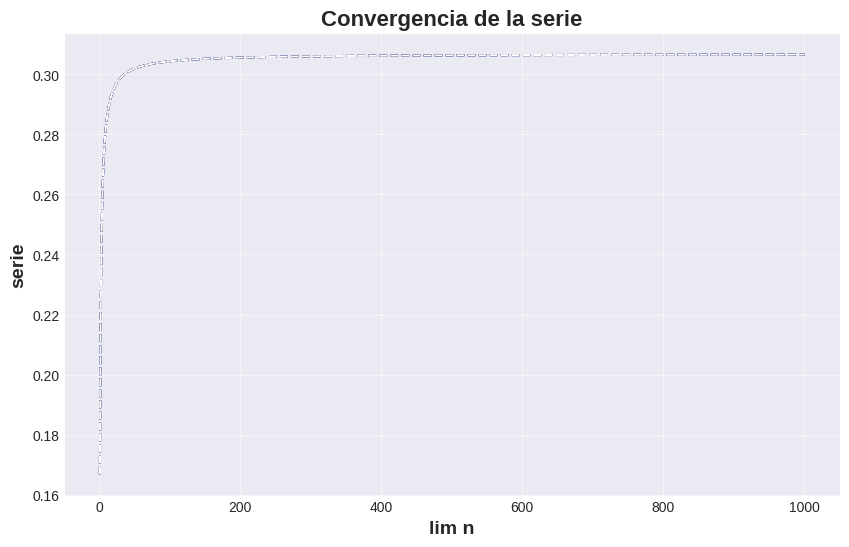

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(lim_val, S1_values, color='blue', linestyle='--')
plt.plot(lim_val, S2_values, color='black', linestyle='--')
plt.plot(lim_val, S3_values, color='white', linestyle='--')

# detalles
plt.xlabel('lim n', fontsize=14, fontweight='bold')
plt.ylabel('serie', fontsize=14, fontweight='bold')
plt.title('Convergencia de la serie', fontsize=16, fontweight='bold')

# cuadros
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()



In [18]:
import numpy as np
import matplotlib.pyplot as plt
lim_val= np.logspace(1, 10, num=100).astype(int)

Error1_= [abs((S1(l) - S3(l)) / S3(l)) for l in lim_val]
Error2_= [abs((S2(l) - S3(l)) / S3(l)) for l in lim_val]

plt.figure(figsize=(12, 8))
plt.loglog(lim_val, Error1_, color='blue', linestyle='--')


plt.title('Error Relativo', fontsize=16, fontweight='bold')

# Mostrar la rejilla para mejor visualización
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()

KeyboardInterrupt: 